# ECON526: Assignment 5

Jesse Perla, Paul Schrimpf, and Phil Solimine

## Setup

Feel free to use the following packages (and we have added a few
convenience imports)

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import pandas as pd

# Q1

## Q1.1

The file `practice_data.csv`, inside the `data` folder, contains data
from a simulated experiment.

Read the dataset into a pandas dataframe. The data contains 2 columns,
`treatment` and `outcome`. The `treatment` column is a binary variable
that indicates whether the subject was assigned to the treatment group
(1) or the control group (0). The `outcome` column is a continuous
variable that indicates the outcome of the experiment for each subject.

Print the head of this dataframe.

In [22]:
# your code here
df_p = pd.read_csv('practice_data.csv')
print(df_p.head())

   treatment    outcome
0        0.0  12.730528
1        0.0   7.533367
2        1.0   4.394966
3        0.0   9.002290
4        0.0  10.519336


Create a histogram of the outcome variable, which has the distributions
of the outcome for the treatment and control groups overlaid on top of
each other in different colors. Make the histogram transparent so that
you can clearly see both distributions. Add a legend to the plot to
indicate which distribution is which.

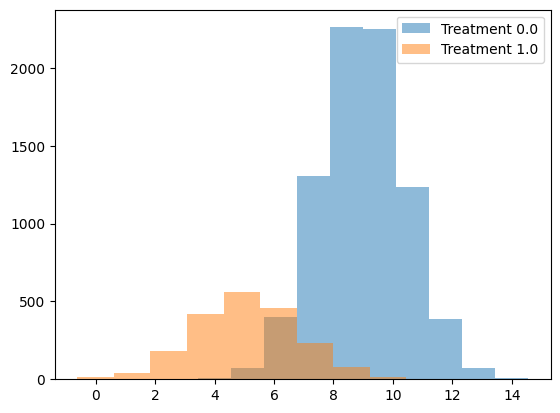

In [23]:
# your code here
fig, ax = plt.subplots()
for _ in np.unique(df_p['treatment']):
    ax.hist(df_p[df_p['treatment']==_]['outcome'], alpha=0.5, label=f'Treatment {_}')
ax.legend()
ax.patch.set_alpha(0.2)
plt.show()

## Q1.2

Estimate the average treatment effect (ATE) using the difference in
sample means as your estimator. Print each sample average and your point
estimate of the ATE as formatted strings. Interpret your result in the
markdown cell below.

In [24]:
# your code here
mean_control = df_p[df_p['treatment']==0]['outcome'].mean()
mean_treatment = df_p[df_p['treatment']==1]['outcome'].mean()

print(f'Mean control: {mean_control}')
print(f'Mean treatment: {mean_treatment}')
print(f'Difference: {mean_treatment - mean_control}')

Mean control: 8.980284426319495
Mean treatment: 5.078088032415784
Difference: -3.9021963939037105


On average, the control group has an outcome that is 3.9 units higher than the treatment group. This is the estimated ATE.

## Q1.3

Now use the standard error formula to calculate the asymptotic standard
errors of each of the sample means, and use these to construct a 95%
confidence interval for the ATE. Print all output in formatted strings.
In the markdown cell below, interpret your confidence interval.

In [25]:
# your code here
se_control = df_p[df_p['treatment']==0]['outcome'].std()
se_treatment = df_p[df_p['treatment']==1]['outcome'].std()

print(f'Control Standard Errors: {se_control / np.sqrt(len(df_p[df_p["treatment"]==0]))}')
print(f'Treatment Standard Errors: {se_treatment / np.sqrt(len(df_p[df_p["treatment"]==1]))}')

alpha = 0.05

ate = mean_treatment - mean_control
se = np.sqrt((se_control**2 + se_treatment**2) / (len(df_p['treatment']) - 2))
ci = scipy.stats.t.interval(1-alpha, len(df_p['treatment']) - 2, loc=ate, scale=se)
print(f'ATE Confidence Interval: {ci}')

Control Standard Errors: 0.015920356842719516
Treatment Standard Errors: 0.0382831103150217
ATE Confidence Interval: (-3.9458514766652075, -3.8585413111422135)


The confidence interval can be interpreted as follows: if we were to repeat the experiment many times, we would expect the true value to be within the confidence interval 95% of the time.

Since 0 is not in the confidence interval, we can reject the null hypothesis that the ATE is 0.

## Q1.4

Estimate the standard errors again using bootstrapping. You should use
1000 bootstrap samples. Print the standard errors and the 95% confidence
interval for the ATE. How are the results different? Is this what you
expected? Explain in the markdown cell below.

Hint: when you resample, make sure to keep the same proportion of
treatment and control observations as in the original sample. An easier
way to do this might be to split the data into treatment and control
groups, resample each group separately, and then combine the resampled
groups back into a single dataframe.

In [26]:
np.random.seed(100) # do not change this line
# your code here

bs_size = 1000

resample = lambda sample_data, sample_size: np.random.choice(sample_data, size=sample_size, replace=True)

len_control = len(df_p[df_p['treatment']==0])
len_treatment = len(df_p[df_p['treatment']==1])

data_control = df_p[df_p['treatment']==0]['outcome']
data_treatment = df_p[df_p['treatment']==1]['outcome']

bootstrap_control = np.array([resample(data_control, len_control).mean() for _ in range(bs_size)])
bootstrap_treatment = np.array([resample(data_treatment, len_treatment).mean() for _ in range(bs_size)])

ate_bs = bootstrap_treatment.mean() - bootstrap_control.mean()

se_bs_control = bootstrap_control.std()
se_bs_treatment = bootstrap_treatment.std()

se_ate = np.sqrt((se_bs_control**2 + se_bs_treatment**2) / (2*bs_size - 2))

print(f'Bootstrap Control SE: {se_bs_control / np.sqrt(len_control)}')
print(f'Bootstrap Treatment SE: {se_bs_treatment / np.sqrt(len_treatment)}')

ci_bs_control = scipy.stats.t.interval(1-alpha, 2*bs_size-2, loc=ate_bs, scale=se_ate)

print(f'Bootstrap Control Confidence Interval: {ci_bs_control}')

Bootstrap Control SE: 0.00017126570213062633
Bootstrap Treatment SE: 0.0008795803369479427
Bootstrap Control Confidence Interval: (-3.905161441289304, -3.90145723843457)


The bootstrap standard errors are much smaller than the previous standard erros. This results in a much narrower confidence interval. This is expected because bootstrap resamples data by drawing from the sample with replacement meaning that we might end up with duplicate observations. This results in standard errors that are smaller.

# Q2

## Q2.1

In class we analyzed the effect of online class formats on student
scores in a course. We found that the online format produced a negative
effect on scores.

The dataset is stored in `data/online_classroom.csv`. Read the data into
a pandas dataframe and print the head.

In [27]:
# your code here
df_online = pd.read_csv('online_classroom.csv')
print(df_online.head())

   gender  asian  black  hawaiian  hispanic  unknown  white  format_ol  \
0       0    0.0    0.0       0.0       0.0      0.0    1.0          0   
1       1    0.0    0.0       0.0       0.0      0.0    1.0          0   
2       1    0.0    0.0       0.0       0.0      0.0    1.0          0   
3       1    0.0    0.0       0.0       0.0      0.0    1.0          0   
4       1    0.0    0.0       0.0       0.0      0.0    1.0          1   

   format_blended  falsexam  
0             0.0  63.29997  
1             0.0  79.96000  
2             1.0  83.37000  
3             1.0  90.01994  
4             0.0  83.30000  


Create a similar plot to the one we created in class, with the
distribution of scores for each class format (online, face-to-face, and
blended) overlaid on top of each other. Make the plot transparent so
that you can clearly see all three distributions. Add a legend to the
plot to indicate which distribution is which. Draw vertical lines on the
plot (using the `vlines` function) to indicate the mean score for each
class format. Make sure that the distributions and vertical lines are
different colors so that you can tell them apart.

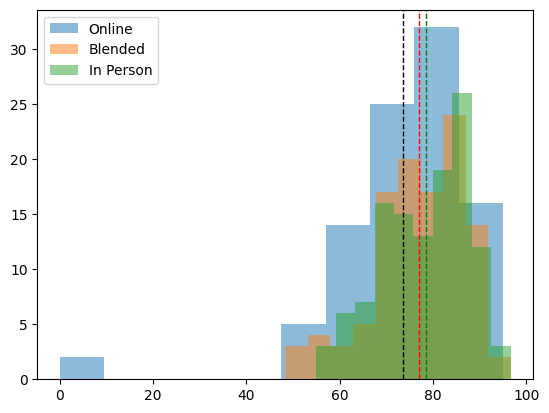

In [28]:
# your code here
fig, ax = plt.subplots()
mask_ol = df_online['format_ol'] == 1
mask_blended = df_online['format_blended'] == 1
mask_inperson = (df_online['format_ol'] == 0) & (df_online['format_blended'] == 0)

ax.hist(df_online[mask_ol]['falsexam'], alpha=0.5, label='Online')
ax.hist(df_online[mask_blended]['falsexam'], alpha=0.5, label='Blended')
ax.hist(df_online[mask_inperson]['falsexam'], alpha=0.5, label='In Person')

ax.axvline(df_online[mask_ol]['falsexam'].mean(), color='black', linestyle='dashed', linewidth=1)
ax.axvline(df_online[mask_blended]['falsexam'].mean(), color='red', linestyle='dashed', linewidth=1)
ax.axvline(df_online[mask_inperson]['falsexam'].mean(), color='green', linestyle='dashed', linewidth=1)

ax.legend()
ax.patch.set_alpha(0.2)
plt.show()

## Q2.2

Follow the steps from class to estimate the average treatment effect
(ATE) of the online format, using the blended format as the control
group. Use using the **difference in sample means** as your estimator.
Print each sample average and your point estimate of the ATE, along with
the standard error of each mean and the standard error of the ATE. Can
you reasonably conclude (at the **90% confidence level**) that the
online format causes lower test scores than the blended format? Explain
in the markdown cell below.

In [29]:
# your code here
mean_online = df_online[mask_ol]['falsexam'].mean()
mean_blended = df_online[mask_blended]['falsexam'].mean()

ate_online = mean_online - mean_blended
se_ate_online = np.sqrt((df_online[mask_ol]['falsexam'].var() + df_online[mask_blended]['falsexam'].var()) / (len(df_online[mask_ol]) + len(df_online[mask_blended]) - 2))

alpha = 0.1
ci_online = scipy.stats.t.interval(1-alpha, len(df_online[mask_ol])+len(df_online[mask_blended])-2, loc=ate_online, scale=se_ate_online)

print(f'Online mean : {mean_online}')
print(f'Blended mean : {mean_blended}')

print(f'Standard Error ATE: {se_ate_online}')

print(f'Online ATE Confidence Interval: {ci_online}')

Online mean : 73.63526308510637
Blended mean : 77.09373137614679
Standard Error ATE: 1.2692973000735959
Online ATE Confidence Interval: (-5.5559437999052115, -1.3609927821756265)


ate_online gives the average treatment effects by subtracting the mean test scores of the blended group from the online group. set_ate_onine is the standard error of the ATE calculated by taking the square root of the sum of the squared standard errors of the online and blended groups. ci_online is the 90% confidence interval for the ATE.

In this case, we can reject the null hypothesis that the ATE is 0 because 0 is not in the confidence interval.

## Q2.3

In class we noticed that there are not all that many observations in the
dataset. It also looks like the distribution of scores is not normal (in
fact, we know it’s not, since the score is bounded below at 0 and above
at 100). So we might be concerned that this, plus the limited amount of
data, means that our asymptotic standard errors are not very accurate.

Use bootstrapping to estimate the standard error of the ATE. You should
use 1000 bootstrap samples. Print the standard errors and the 90%
confidence interval for the ATE. How are the results different?

Is this what you expected? Does it seem like we have enough data for the
estimator to approach its asymptotic distribution? Explain in the
markdown cell below.

Hint: like before, start by splitting the data into treatment (online)
and control (blended) groups. Define a function that will resample the
dataframes. Then resample each group separately to maintain the right
proportion of treatment and control observations.

In [30]:
np.random.seed(100) # do not change this line
# your code here

len_online = len(df_online[mask_ol])
len_blend = len(df_online[mask_blended])

data_online = df_online[mask_ol]['falsexam']
data_blend = df_online[mask_blended]['falsexam']

bootstrap_online = np.array([resample(data_online, len_online).mean() for _ in range(bs_size)])
bootstrap_blend = np.array([resample(data_blend, len_blend).mean() for _ in range(bs_size)])

ate_bs = bootstrap_online.mean() - bootstrap_blend.mean()

se_bs_online = bootstrap_online.std()
se_bs_blend = bootstrap_blend.std()

se_ate = np.sqrt((se_bs_online**2 + se_bs_blend**2) / (len_online + len_blend - 2))

print(f'Bootstrap SE: {se_ate}')

ci_bs_control = scipy.stats.t.interval(1-alpha, 2*bs_size-2, loc=ate_bs, scale=se_ate)

print(f'Bootstrap Control Confidence Interval: {ci_bs_control}')

Bootstrap SE: 0.12700813081256626
Bootstrap Control Confidence Interval: (-3.6906820490720946, -3.2726686646366976)


Simillar to the previous question, the bootstrap standard errors are much smaller than the previous standard erros. This is due to the resampling that draws with replacement, leading to potential duplicate results. This results in a much narrower confidence interval.

It looks like we have enough data for the estimator to approach its asymptotic distribution. 